In [89]:
import cv2
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D, Dropout
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from tensorflow.keras.applications.resnet50 import preprocess_input
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import scipy
import random
import gc
import glob
from keras.utils.vis_utils import plot_model


In [90]:
#Read in CSV FER2013 data.
data = pd.read_csv('/com.docker.devenvironments.code/fer2013/icml_face_data.csv')

In [91]:
#Split data by image data and emotion label.
pixel_data = data[' pixels']
label_data = data['emotion']

In [92]:
#Check length of labels to give total images in dataset.
len(label_data)

35887

In [93]:
#Preproccess pixels so CSV data can be generated into an image.
def preprocess_pixels(pixel_data):
  images = []
  for i in range(len(pixel_data)):
    img = np.fromstring(pixel_data[i], dtype='int', sep=' ')
    img = img.reshape(48,48,1)
    images.append(img)

  X = np.array(images)
  return X



In [94]:
#Oversampler which duplicates images within the categories containing less images, provides unbiased training.
oversampler = RandomOverSampler(sampling_strategy='auto')

X_over, Y_over = oversampler.fit_resample(pixel_data.values.reshape(-1,1), label_data)

In [95]:
X_over_series = pd.Series(X_over.flatten())
X_over_series

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    146 147 147 147 148 140 135 149 161 165 161 10...
62919    21 13 4 1 3 12 24 44 57 62 55 59 60 72 106 115...
62920    20 16 11 11 11 7 5 35 34 40 40 50 74 100 119 1...
62921    68 67 67 71 74 79 84 78 68 56 42 36 43 55 54 6...
62922    6 7 12 28 48 61 61 39 29 62 67 74 112 124 99 1...
Length: 62923, dtype: object

In [96]:
X = preprocess_pixels(X_over_series)
Y = Y_over

In [97]:
Y = Y_over.values.reshape(Y.shape[0],1)
Y.shape

(62923, 1)

In [98]:
#Split data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 45)
print(X_train.shape, Y_train.shape)

(56630, 48, 48, 1) (56630, 1)


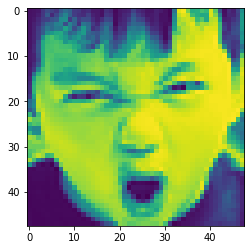

In [99]:
#Test that image generation works from CSV data.
plt.imshow(X[25000,:,:,0])

In [100]:
#Set data to be categorical, with 7 categories.
y_train = to_categorical(Y_train, num_classes=7)
y_test = to_categorical(Y_test, num_classes=7)


In [101]:
#Define what each label is based upon it's assigned number in CSV.
label_dict = {0 : 'Angry', 1 : 'Disgust', 2 : 'Fear', 3 : 'Happiness', 4 : 'Sad', 5 : 'Surprise', 6 : 'Neutral'}


In [102]:
#Load each model ready to test.
model = load_model('Original Model')
model2 = load_model('ResNet-HardCode')
model3 = load_model('ResNet-HardCode2')
model4 = load_model('ResNet-HardCode3')
model5 = load_model('Original Improved NO RESNET')

In [103]:
#Prediction function that is passed image data for each model.
preds = model.predict(X_train)
def get_class(preds):
  pred_class = np.zeros((preds.shape[0],1))

  for i in range(len(preds)):
   pred_class[i] = np.argmax(preds[i])

  return pred_class

pred_class_train = get_class(preds)

Original Model - Prediction
The predicted emotion is : Neutral


/home/vscode/.local/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


25/25 [==============================] - 7s 265ms/step - loss: 0.8991 - accuracy: 0.8161
Original Model - testing loss, testing acc [0.8990946412086487, 0.8161449432373047]


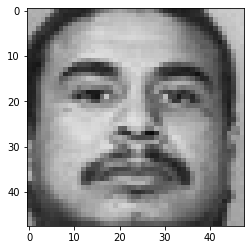

In [104]:
#Pull random image from Image file, test it on each model.
test_image_count = len(os.listdir('/com.docker.devenvironments.code/fer2013/RandomImages'))
print('Original Model - Prediction')

test_image = random.choice(os.listdir('/com.docker.devenvironments.code/fer2013/RandomImages'))

img_path = ('/com.docker.devenvironments.code/fer2013/RandomImages/' + test_image)
img = image.load_img(img_path, grayscale=True, target_size=(48,48,1))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

prediction = np.argmax(model.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)

#Evaluate model, giving testing loss and accuracy, on a batch of 256 random inputs.
results = model.evaluate(X_test, y_test, batch_size = 256)
print("Original Model - testing loss, testing acc",results)

In [105]:
preds = model2.predict(X_train)
def get_class(preds):
  pred_class = np.zeros((preds.shape[0],1))

  for i in range(len(preds)):
   pred_class[i] = np.argmax(preds[i])

  return pred_class

pred_class_train = get_class(preds)

ResNet-50 Model Manually Coded With CSV Input - Prediction
The predicted emotion is : Surprise
25/25 [==============================] - 13s 498ms/step - loss: 0.9737 - accuracy: 0.7858
ResNet-50 Manually Coded With CSV Input - testing loss, testing acc [0.9737499952316284, 0.7857937216758728]


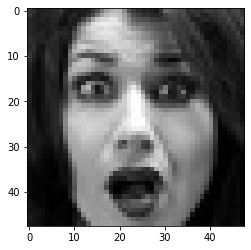

In [106]:
test_image_count = len(os.listdir('/com.docker.devenvironments.code/fer2013/RandomImages'))
print('ResNet-50 Model Manually Coded With CSV Input - Prediction')

test_image = random.choice(os.listdir('/com.docker.devenvironments.code/fer2013/RandomImages'))

img_path = ('/com.docker.devenvironments.code/fer2013/RandomImages/' + test_image)
img = image.load_img(img_path, grayscale=True, target_size=(48,48,1))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

prediction = np.argmax(model2.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)

results = model2.evaluate(X_test, y_test, batch_size = 256)
print("ResNet-50 Manually Coded With CSV Input - testing loss, testing acc",results)

In [107]:
preds = model3.predict(X_train)
def get_class(preds):
  pred_class = np.zeros((preds.shape[0],1))

  for i in range(len(preds)):
   pred_class[i] = np.argmax(preds[i])

  return pred_class

pred_class_train = get_class(preds)

ResNet-50 Model Manually Coded With CSV Input (1st Fix) - Prediction
The predicted emotion is : Sad
25/25 [==============================] - 17s 545ms/step - loss: 0.8854 - accuracy: 0.7842
ResNet-50 Manually Coded With CSV Input (1st Fix) - testing loss, testing acc [0.8853749632835388, 0.7842046618461609]


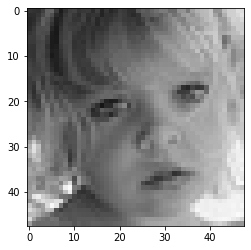

In [108]:
test_image_count = len(os.listdir('/com.docker.devenvironments.code/fer2013/RandomImages'))
print('ResNet-50 Model Manually Coded With CSV Input (1st Fix) - Prediction')

test_image = random.choice(os.listdir('/com.docker.devenvironments.code/fer2013/RandomImages'))

img_path = ('/com.docker.devenvironments.code/fer2013/RandomImages/' + test_image)
img = image.load_img(img_path, grayscale=True, target_size=(48,48,1))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

prediction = np.argmax(model3.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)

results = model3.evaluate(X_test, y_test, batch_size = 256)
print("ResNet-50 Manually Coded With CSV Input (1st Fix) - testing loss, testing acc",results)

In [109]:
preds = model4.predict(X_train)
def get_class(preds):
  pred_class = np.zeros((preds.shape[0],1))

  for i in range(len(preds)):
   pred_class[i] = np.argmax(preds[i])

  return pred_class

pred_class_train = get_class(preds)

ResNet-50 Model Manually Coded With CSV Input (2nd Fix) - Prediction
The predicted emotion is : Happiness
25/25 [==============================] - 10s 376ms/step - loss: 0.9158 - accuracy: 0.7682
ResNet-50 Manually Coded With CSV Input (2nd Fix) - testing loss, testing acc [0.915766179561615, 0.7681550979614258]


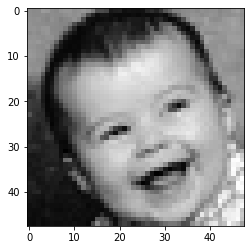

In [110]:
test_image_count = len(os.listdir('/com.docker.devenvironments.code/fer2013/RandomImages'))
print('ResNet-50 Model Manually Coded With CSV Input (2nd Fix) - Prediction')

test_image = random.choice(os.listdir('/com.docker.devenvironments.code/fer2013/RandomImages'))

img_path = ('/com.docker.devenvironments.code/fer2013/RandomImages/' + test_image)
img = image.load_img(img_path, grayscale=True, target_size=(48,48,1))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

prediction = np.argmax(model4.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)

results = model4.evaluate(X_test, y_test, batch_size = 256)
print("ResNet-50 Manually Coded With CSV Input (2nd Fix) - testing loss, testing acc",results)

In [111]:
preds = model5.predict(X_train)
def get_class(preds):
  pred_class = np.zeros((preds.shape[0],1))

  for i in range(len(preds)):
   pred_class[i] = np.argmax(preds[i])

  return pred_class

pred_class_train = get_class(preds)

Final Attempt at Improving Original Model - Prediction
The predicted emotion is : Sad
25/25 [==============================] - 5s 196ms/step - loss: 0.7448 - accuracy: 0.7281
Final Attempt at Improving Original Model - testing loss, testing acc [0.744829535484314, 0.7281106114387512]


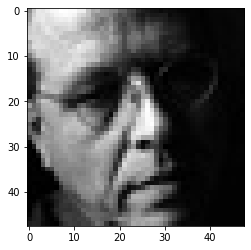

In [112]:
test_image_count = len(os.listdir('/com.docker.devenvironments.code/fer2013/RandomImages'))
print('Final Attempt at Improving Original Model - Prediction')

test_image = random.choice(os.listdir('/com.docker.devenvironments.code/fer2013/RandomImages'))

img_path = ('/com.docker.devenvironments.code/fer2013/RandomImages/' + test_image)
img = image.load_img(img_path, grayscale=True, target_size=(48,48,1))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

prediction = np.argmax(model5.predict(x))
print('The predicted emotion is : ' + label_dict[prediction])
my_image = image.load_img(img_path)
plt.imshow(my_image)

results = model5.evaluate(X_test, y_test, batch_size = 256)
print("Final Attempt at Improving Original Model - testing loss, testing acc",results)